In [1]:
!pip install pandas

In [2]:
!pip install sklearn
!pip install matplotlib
!pip install numpy
!pip install scipy

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [3]:
!pip install scikit-learn

In [5]:
import pandas as pd

df = pd.read_csv('ty_traffic.csv')

df.head()

,year,breau,timescale,count
0,101,桃園區,0~2,120
1,101,桃園區,2~4,57
2,101,桃園區,4~6,67
3,101,桃園區,6~8,444
4,101,桃園區,8~10,585


In [6]:
missing_values = df.isnull().sum()

print(missing_values)

year         0
breau        0
timescale    0
count        0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()

df['count_scaled'] = scaler.fit_transform(df[['count']])

print(df[['count', 'count_scaled']].head())

   count  count_scaled
0    120     -0.606312
1     57     -0.710858
2     67     -0.694263
3    444     -0.068647
4    585      0.165336


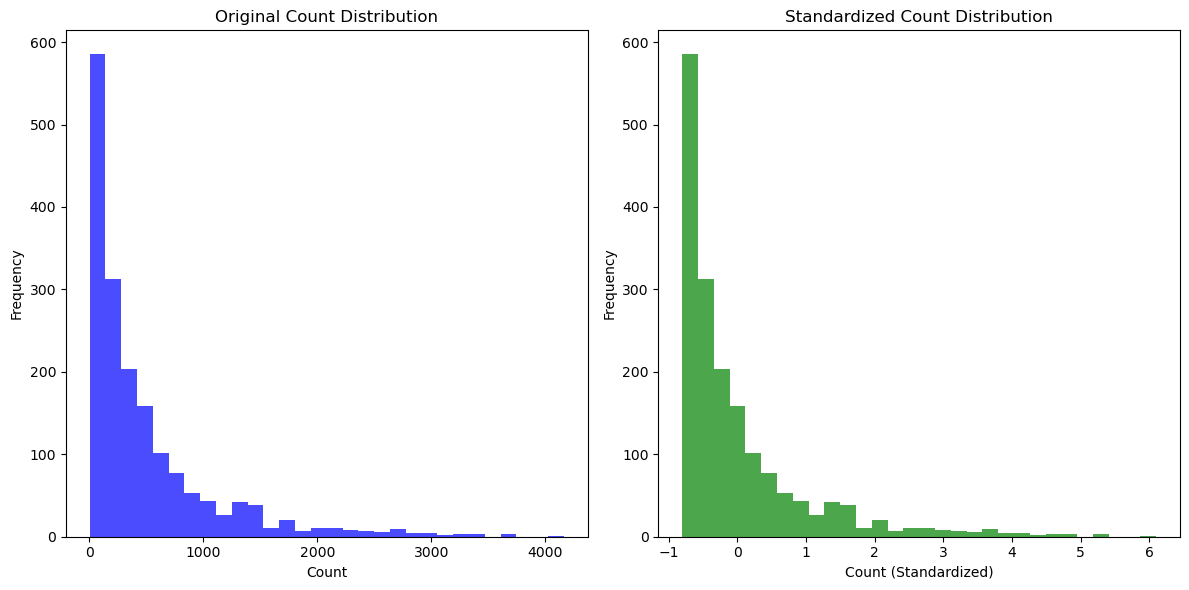

In [10]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.hist(df['count'], bins=30, color='blue', alpha=0.7)
plt.title('Original Count Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(df['count_scaled'], bins=30, color='green', alpha=0.7)
plt.title('Standardized Count Distribution')
plt.xlabel('Count (Standardized)')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

In [21]:

from sklearn.feature_selection import VarianceThreshold

df_encoded = pd.get_dummies(df, columns=['breau', 'timescale'], drop_first=False)  #不想丟棄類別

X = df_encoded.drop(columns=['count', 'count_scaled'])
y = df_encoded['count_scaled'] 

variances = X.var() #計算每個特徵的方差

selector = VarianceThreshold(threshold=0.06)
X_selected = selector.fit_transform(X)


selected_features = X.columns[selector.get_support()]

print("Selected features after VarianceThreshold:", selected_features.tolist())

print("\nFeature variances:")
for feature, variance in variances.items():
    if feature in selected_features:
        status = "Selected"
    else:
        status = "Removed"
    print(f"{feature}: Variance = {variance:.4f}, Status = {status}")

Selected features after VarianceThreshold: ['year', 'breau_中壢區', 'breau_八德區', 'breau_大園區', 'breau_大溪區', 'breau_平鎮區', 'breau_桃園區', 'breau_楊梅區', 'breau_蘆竹區', 'breau_龍潭區', 'breau_龜山區', 'timescale_0~2', 'timescale_10~12', 'timescale_12~14', 'timescale_14~16', 'timescale_16~18', 'timescale_18~20', 'timescale_20~22', 'timescale_22~24', 'timescale_2~4', 'timescale_4~6', 'timescale_6~8', 'timescale_8~10']

Feature variances:
year: Variance = 11.3288, Status = Selected
breau_中壢區: Variance = 0.0755, Status = Selected
breau_八德區: Variance = 0.0755, Status = Selected
breau_大園區: Variance = 0.0755, Status = Selected
breau_大溪區: Variance = 0.0755, Status = Selected
breau_平鎮區: Variance = 0.0755, Status = Selected
breau_復興區: Variance = 0.0513, Status = Removed
breau_新屋區: Variance = 0.0579, Status = Removed
breau_桃園區: Variance = 0.0755, Status = Selected
breau_楊梅區: Variance = 0.0755, Status = Selected
breau_蘆竹區: Variance = 0.0755, Status = Selected
breau_觀音區: Variance = 0.0579, Status = Removed
breau_龍潭區: